{% include toc title="In This Lesson" icon="file-text" %}


In this lesson, we will learn how to import a larger dataset, and test our
skills cleaning and plotting the data.


<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Import a text file into R.
* Plot quantitative time series data using ggplot
* Ensure that NoData values do not interfere with quantitative analysis by setting them to `NA` in `R`.
* Use the `na.rm` argument when performing math with large datasets.
* Subset data using the dplyr `filter()` function
* Use dplyr pipes to filter data in R.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need

You need `R` and `RStudio` to complete this tutorial. Also you should have
an `earth-analytics` directory setup on your computer with a `/data`
directory with it.

* [How to Setup R / RStudio](/course-materials/earth-analytics/week-1/setup-r-rstudio/)
* [Setup your working directory](/course-materials/earth-analytics/week-1/setup-working-directory/)
* [Intro to the R & RStudio Interface](/course-materials/earth-analytics/week-1/intro-to-r-and-rstudio)

### R Libraries to Install:

* **ggplot2:** `install.packages("ggplot2")`
* **dplyr:** `install.packages("dplyr")`


[<i class="fa fa-download" aria-hidden="true"></i> Download Week 2 Data](https://ndownloader.figshare.com/files/7426738){:data-proofer-ignore='' .btn }

</div>

## Important - Data Organization
Before you begin this lesson, be sure that you've downloaded the dataset above.
You will need to UNZIP the zip file. When you do this, be sure that your directory
looks like the image below: note that all of the data are within the week2
directory. They are not nested within another directory. You may have to copy and
paste your files to make this look right.

<figure>
<a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-2/week2-data.png">
<img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-2/week2-data.png" alt="week 2 file organization">
</a>
<figcaption>Your `week2` file directory should look like the one above. Note that
the data directly under the week-2 folder.</figcaption>
</figure>

## Get started with time series data
Let's get started by loading the `ggplot2` and `dplyr` libraries. Also, let's set
our working directory. Finally, set `stringsAsFactors` to `FALSE` globally as
shown below.




In [16]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib
plt.ion()
# be sure to set your working directory\n",
os.chdir("/Users/lewa8222/Documents/earth-analytics/")

In [32]:
# This is the code that i used to process the data -- can we hide this chunk?
precip_boulder = pd.read_csv('data/week2/precipitation/805325-precip-daily-2003-2013.csv', 
                             parse_dates=['DATE'])
# aggregate the data by date
precip_boulder_daily = precip_boulder.groupby('DATE').aggregate(
    {'HPCP': 'sum', 'STATION': 'first', 'ELEVATION': 'first',
     'STATION_NAME': 'first', 'LATITUDE': 'first', 'LONGITUDE': 'first'})
# rename the HPCP column to a human readable column name
precip_boulder_daily = precip_boulder_daily.rename(columns={'HPCP': 'DAILY_PRECIP'})
# add the year column
precip_boulder_daily['YEAR'] = precip_boulder_daily.index.year
# julian is wrong?? - 
precip_boulder_daily['JULIAN'] = precip_boulder_daily.index.date
# is this really jday??
precip_boulder_daily['JULIAN'].head()

DATE
2003-01-01 01:00:00    2003-01-01
2003-02-01 01:00:00    2003-02-01
2003-02-02 19:00:00    2003-02-02
2003-02-02 22:00:00    2003-02-02
2003-02-03 02:00:00    2003-02-03
Name: JULIAN, dtype: object

In [8]:
# this is exporting to a csv... i'm not sure if we still need to do this. 
# precip_boulder_daily.to_csv('./data/week_02-hw/precipitation/805325-precip-dailysum-2003-2013.csv')

In [13]:
# import the data
precip_boulder = pd.read_csv('data/week2/precipitation/805325-precip-dailysum-2003-2013.csv', 
                             parse_dates=['DATE'])

## Import precipitation time series

We will use a precipitation dataset derived from data accessed through the
National Centers for Environmental Information (formerly
National Climate Data Center) Cooperative Observer Network (COOP)
station 050843 in Boulder, CO. The data time span is: 1 January 2003 through 31
December 2013.

We can use pandas `ps.read_csv()` to import the `.csv` file.

In [36]:
#boulder_daily_precip = pd.read_csv('data/week2/precipitation/805325-precip-dailysum-2003-2013.csv', parse_dates=['DATE'])
#boulder_daily_precip.head(6)

In [35]:
# view data summary statistics
#boulder_daily_precip.describe()

,DAILY_PRECIP,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
count,792.000000,792.0,792.000000,792.000000,792.000000,792.000000
mean,5.297045,1650.5,40.033850,-105.281106,2007.967172,175.541667
std,70.915223,0.0,0.000045,0.000005,3.149287,98.536373
min,0.000000,1650.5,40.033800,-105.281110,2003.000000,1.000000
25%,0.100000,1650.5,40.033800,-105.281110,2005.000000,96.000000
50%,0.100000,1650.5,40.033890,-105.281110,2008.000000,167.000000
75%,0.300000,1650.5,40.033890,-105.281100,2011.000000,255.250000
max,999.990000,1650.5,40.033890,-105.281100,2013.000000,365.000000


In [37]:
# in class i think i had them download the data -- so the code above would be hidden and not run.

# download data from figshare (note - we did this in a previous lesson)
urllib.request.urlretrieve(url='https://ndownloader.figshare.com/files/7283285', 
                           filename= 'data/week2/805325-precip-dailysum_2003-2013.csv')


# read the data into python
boulder_daily_precip = pd.read_csv('data/week2/precipitation/805325-precip-dailysum-2003-2013.csv', 
                                   parse_dates=['DATE'])
# view first 5 rows
boulder_daily_precip.head()

,DATE,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
0,2003-01-01,0.00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
1,2003-01-05,999.99,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2,2003-02-01,0.00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
3,2003-02-02,999.99,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
4,2003-02-03,0.40,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


In [38]:
# view structure of data
boulder_daily_precip.dtypes

DATE            datetime64[ns]
DAILY_PRECIP           float64
STATION                 object
STATION_NAME            object
ELEVATION              float64
LATITUDE               float64
LONGITUDE              float64
YEAR                     int64
JULIAN                   int64
dtype: object

In [39]:
# view summary stats for the precip data - note the max value
boulder_daily_precip['DAILY_PRECIP'].describe()


count    792.000000
mean       5.297045
std       70.915223
min        0.000000
25%        0.100000
50%        0.100000
75%        0.300000
max      999.990000
Name: DAILY_PRECIP, dtype: float64

### About the Data

Viewing the structure of these data, we can see that different types of data are included in
this file.

* **STATION** and **STATION_NAME**: Identification of the COOP station.
* **ELEVATION, LATITUDE** and **LONGITUDE**: The spatial location of the station.
* **DATE**: The date when the data were collected in the format: YYYYMMDD. Notice that DATE is
currently class `chr`, meaning the data is interpreted as a character class and
not as a date.
* **DAILY_PRECIP**: The total precipitation in inches. Important: the metadata
notes that the value 999.99 indicates missing data. Also important,
hours with no precipitation are not recorded.
* **YEAR**: the year the data were collected
* **JULIAN**: the JULIAN DAY the data were collected.


Additional information about the data, known as metadata, is available in the
<a href="https://ndownloader.figshare.com/files/7283453">PRECIP_HLY_documentation.pdf</a>.
The metadata tell us that the noData value for these data is 999.99. IMPORTANT:
we have modified these data a bit for ease of teaching and learning. Specifically,
we've aggregated the data to represent daily sum values and added some noData
values to ensure you learn how to clean them!

You can download the original complete data subset with additional documentation
<a href="https://figshare.com/articles/NEON_Remote_Sensing_Boulder_Flood_2013_Teaching_Data_Subset_Lee_Hill_Road/3146284">here. </a>

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge

Using everything you've learned in the previous lessons:

* Import the dataset: `data/week2/precipitation/805325-precip-dailysum-2003-2013.csv`
* Clean the data by assigning noData values to `NA`
* Make sure the date column is a date class
* When you are done, plot it using `ggplot()`.
  * Be sure to include a TITLE, and label the X and Y axes.
  * Change the color of the plotted points

Some notes to help you along:

* Date: be sure to take of the date format when you import the data.
* NoData Values: We know that the no data value = 999.99. We can account for this
when we read in the data. Remember how?

Your final plot should look something like the plot below.
</div>

In [42]:
# this code chunk needs to be hidden
# import the data specifying the na_value 
boulder_daily_precip = pd.read_csv('data/week2/precipitation/805325-precip-dailysum-2003-2013.csv', parse_dates=['DATE'],
                                   na_values=[999.99])
boulder_daily_precip.head(6)

,DATE,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
0,2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
1,2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2,2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
3,2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
4,2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34
5,2003-02-05,0.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,36


In [43]:
# is the max value different now?
boulder_daily_precip['DAILY_PRECIP'].describe()

count    788.000000
mean       0.247843
std        0.462558
min        0.000000
25%        0.100000
50%        0.100000
75%        0.300000
max        9.800000
Name: DAILY_PRECIP, dtype: float64

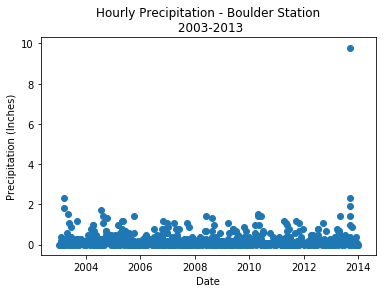

In [44]:
# plot the data -- i need to revisit as some of this was hidden
# this plot seems weird now - not sure why
fig, ax = plt.subplots()
# note the use of .values here...
ax.scatter(boulder_daily_precip['DATE'].values, boulder_daily_precip['DAILY_PRECIP'].values)
ax.set(xlabel="Date", 
       ylabel="Precipitation (Inches)", 
       title="Hourly Precipitation - Boulder Station\n 2003-2013");


<i fa fa-star></i>**Data Tip:**For a more thorough review of date/time classes, see the NEON tutorial
<a href="http://www.neondataskills.org/R/time-series-convert-date-time-class-POSIX/" target="_blank"> *Dealing With Dates & Times in R - as.Date, POSIXct, POSIXlt*</a>.
{: .notice--success}


<div class="notice--warning" markdown="1">
## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge

Take a close look at the plot.

* What does each point represent?
* Use the `min()` and `max()` functions to determine the minimum and maximum precipitation values for the 10 year span?

</div>

## Subset the Data

If we wanted to zoom in and look at some data over a smaller time period, we can
subset it. Let create a subset of data for the time period around the flood between 15
August to 15 October 2013. We will use the pandas `.query()` function
to do this.

To subset by a range of dates, we specify the range as follows

`DATE > "2013-08-15" and DATE <= "2013-10-15"`

In the code above we are asking python to only select rows where the DATE value is greater than 2013-08-15 and less than 2013-10-15

In [45]:
# subset the data 
precip_boulder_AugOct = boulder_daily_precip.query('DATE >= "2013-08-15" and DATE <= "2013-10-15"')

# is there a pipes equivalent in python?


In [46]:
# did it work? 
print(precip_boulder_AugOct['DATE'].min())
print(precip_boulder_AugOct['DATE'].max())

2013-08-21 00:00:00
2013-10-11 00:00:00


In [17]:
# ```{r check-subset, fig.cap="precip plot subset" }

# # check the first & last dates

# min(precip_boulder_AugOct$DATE)

# max(precip_boulder_AugOct$DATE)

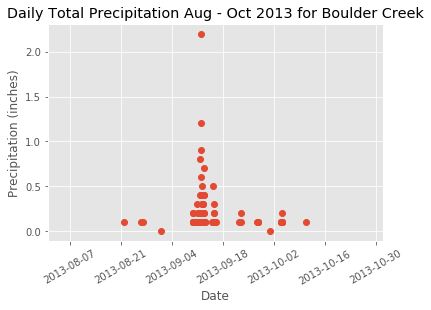

In [18]:
fig, ax = plt.subplots()
ax.plot(precip_boulder_AugOct['DATE'], precip_boulder_AugOct['DAILY_PRECIP'], 'o')
plt.setp(ax.get_xticklabels(), rotation=30)
ax.set(xlabel="Date", ylabel="Precipitation (inches)",
       title="Daily Total Precipitation Aug - Oct 2013 for Boulder Creek",
       xlim=["2013-08-01", "2013-11-01"]);

In [19]:
# # create new plot

# precPlot_flood2 <- ggplot(data=precip_boulder_AugOct, aes(DATE,DAILY_PRECIP)) +

#   geom_bar(stat="identity") +

#   xlab("Date") + ylab("Precipitation (inches)") +

#   ggtitle("Daily Total Precipitation Aug - Oct 2013 for Boulder Creek")



# precPlot_flood2



# ```

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge

Create a subset from the same dates in 2012 to compare to the 2013 plot.
Use the ylim() argument to ensure the y axis range is the SAME as the previous
plot - from 0 to 10".

How different was the rainfall in 2012?

HINT: type `?lims` in the console to see how the `xlim` and `ylim` arguments work.


</div>

In [20]:
precip_boulder_AugOct_2012 = boulder_daily_precip.query('DATE > "2012-08-15" and DATE <= "2012-10-15"')

 (734716.0, 734808.0),

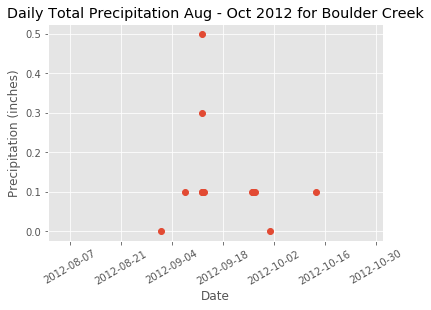

In [21]:
fig, ax = plt.subplots()
ax.plot(precip_boulder_AugOct_2012['DATE'], precip_boulder_AugOct_2012['DAILY_PRECIP'], 'o')
plt.setp(ax.get_xticklabels(), rotation=30)
ax.set(xlabel="Date", ylabel="Precipitation (inches)",
       title="Daily Total Precipitation Aug - Oct 2012 for Boulder Creek",
       xlim=["2012-08-01", "2012-11-01"])

In [22]:
# ```{r challenge, echo=FALSE, warning="hide", fig.cap="precip plot subset 2" }



# # subset 2 months around flood

# precip_boulder_AugOct_2012 <- boulder_daily_precip %>%

#                         filter(DATE >= as.Date('2012-08-15') & DATE <= as.Date('2012-10-15'))



# # create new plot

# precPlot_flood_2012 <- ggplot(data=precip_boulder_AugOct_2012, aes(DATE,DAILY_PRECIP)) +

#   geom_bar(stat="identity") +

#   xlab("Date") + ylab("Precipitation (inches)") +

#   ggtitle("Daily Total Precipitation Aug - Oct 2012 for Boulder Creek") +

#   ylim(0,10)



# precPlot_flood_2012



# ```
